In [1]:
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
zipref = zipfile.ZipFile("glasses_dataset.zip")
zipref.extractall()
zipref.close()

In [12]:
train_dir = "train"
valid_dir = "validate"
IMG_SIZE = (224,224)

In [4]:
train_gen = ImageDataGenerator(rotation_range=20,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest',
                                rescale=1.0/255.0)

valid_gen = ImageDataGenerator(rescale=1/255.)

train_data = train_gen.flow_from_directory(directory="train",
                                           batch_size=10,
                                           shuffle=True,
                                           class_mode='binary',
                                           target_size=(224,224))

valid_data = valid_gen.flow_from_directory(directory='train',
                                           batch_size=10,
                                           shuffle=True,
                                           class_mode='binary',
                                           target_size=(224,224))


Found 104 images belonging to 2 classes.
Found 104 images belonging to 2 classes.


In [5]:
image, labels = train_data.next()

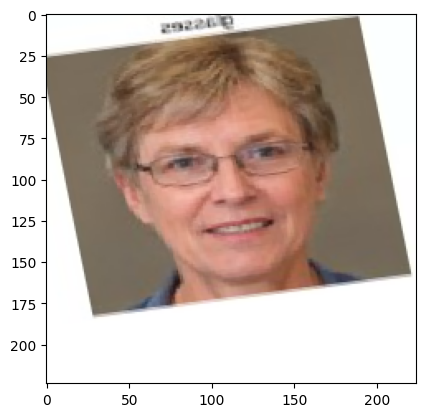

In [6]:
import matplotlib.pyplot as plt
import random
indx = random.randint(0, len(image)-1)
plt.imshow(image[indx])

In [7]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras import Sequential

model = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(224,224,3)),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),

    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),

    Flatten(),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history_1 = model.fit(train_data,
                      epochs=50,
                      steps_per_epoch=len(train_data),
                      validation_data = valid_data,
                      validation_steps=len(valid_data))

Epoch 1/50
11/11 [==============================] - 9s 212ms/step - loss: 0.7387 - accuracy: 0.4808 - val_loss: 0.7040 - val_accuracy: 0.5000
Epoch 2/50
11/11 [==============================] - 1s 131ms/step - loss: 0.6944 - accuracy: 0.5096 - val_loss: 0.6923 - val_accuracy: 0.5288
Epoch 3/50
11/11 [==============================] - 2s 139ms/step - loss: 0.6957 - accuracy: 0.5769 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 4/50
11/11 [==============================] - 2s 215ms/step - loss: 0.6914 - accuracy: 0.5192 - val_loss: 0.6838 - val_accuracy: 0.5000
Epoch 5/50
11/11 [==============================] - 2s 138ms/step - loss: 0.6876 - accuracy: 0.5481 - val_loss: 0.6697 - val_accuracy: 0.5769
Epoch 6/50
11/11 [==============================] - 1s 125ms/step - loss: 0.6936 - accuracy: 0.5096 - val_loss: 0.6406 - val_accuracy: 0.6058
Epoch 7/50
11/11 [==============================] - 1s 131ms/step - loss: 0.6486 - accuracy: 0.6154 - val_loss: 0.5870 - val_accuracy: 0.6923
Epoch 

In [8]:
def plot_loss_curves(history):
  """
  Returns separate loss curve for training and validation metrics.
  """

  loss = history.history["loss"]
  val_loss = history.history['val_loss']

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title("loss")
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

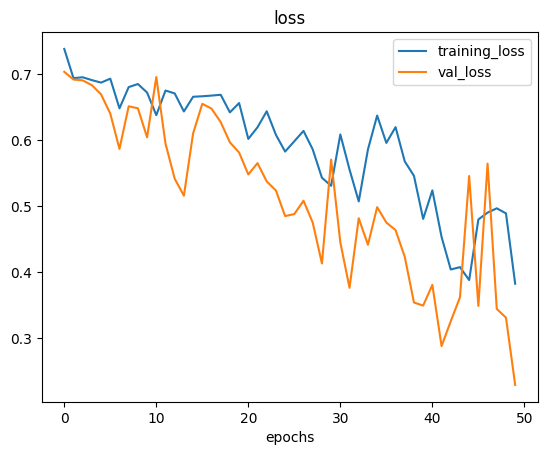

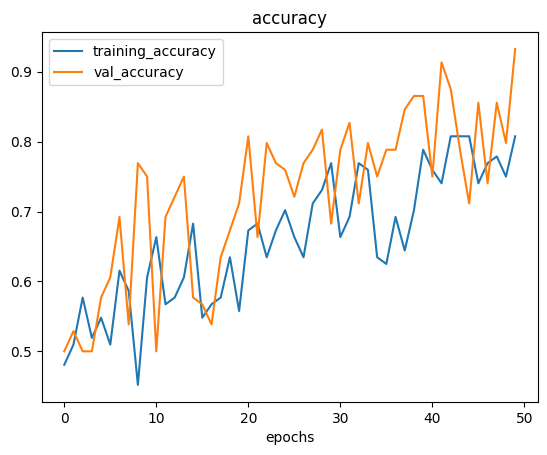

In [9]:
plot_loss_curves(history_1)

In [14]:
import tensorflow_hub as hub
import tensorflow as tf

efficientnet_url = "https://www.kaggle.com/models/tensorflow/efficientnet/frameworks/TensorFlow2/variations/b0-feature-vector/versions/1"

In [22]:
feature_extractor_layer = hub.KerasLayer(efficientnet_url,
                                        trainable=False,
                                        name="feature_extrator",
                                        input_shape=(224,224,3))
model_2 = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [23]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extrator (KerasLay  (None, 1280)              4049564   
 er)                                                             
                                                                 
 dense_3 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 4050845 (15.45 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 4049564 (15.45 MB)
_________________________________________________________________


In [24]:
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


In [25]:
history_2 = model_2.fit(train_data,
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/50
11/11 [==============================] - 12s 228ms/step - loss: 0.7010 - accuracy: 0.4904 - val_loss: 0.6501 - val_accuracy: 0.6250
Epoch 2/50
11/11 [==============================] - 2s 137ms/step - loss: 0.5835 - accuracy: 0.7596 - val_loss: 0.5810 - val_accuracy: 0.7692
Epoch 3/50
11/11 [==============================] - 2s 147ms/step - loss: 0.4929 - accuracy: 0.8846 - val_loss: 0.5291 - val_accuracy: 0.7788
Epoch 4/50
11/11 [==============================] - 1s 137ms/step - loss: 0.4843 - accuracy: 0.8269 - val_loss: 0.5108 - val_accuracy: 0.7788
Epoch 5/50
11/11 [==============================] - 1s 133ms/step - loss: 0.3852 - accuracy: 0.8750 - val_loss: 0.4750 - val_accuracy: 0.7692
Epoch 6/50
11/11 [==============================] - 1s 132ms/step - loss: 0.3881 - accuracy: 0.8654 - val_loss: 0.4246 - val_accuracy: 0.8269
Epoch 7/50
11/11 [==============================] - 2s 150ms/step - loss: 0.3692 - accuracy: 0.8750 - val_loss: 0.3954 - val_accuracy: 0.8654
Epoch

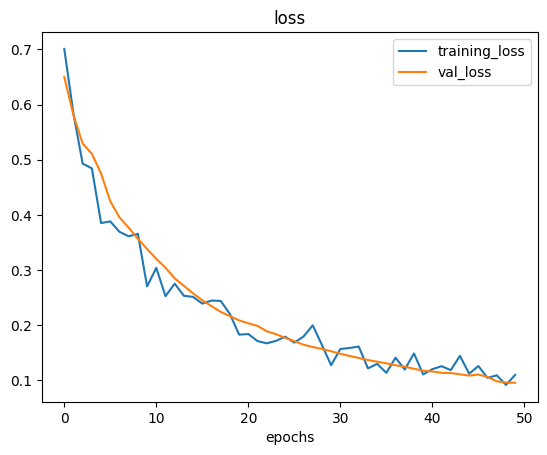

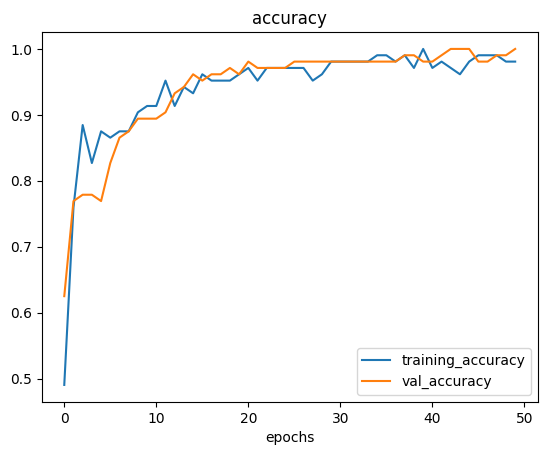

In [26]:
plot_loss_curves(history_2)